In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# 1) Щоденні метрики (30 днів)
date = pd.date_range('2025-03-01', periods=30, freq='D')
visits = (rng.normal(800, 120, size=30).clip(400) + np.linspace(0, 200, 30)).round().astype(int)
orders = (visits * rng.uniform(0.03, 0.06, size=30)).round().astype(int)
daily = pd.DataFrame({'date': date, 'visits': visits, 'orders': orders})

# 2) Продажі по категоріях (штучні, 5 категорій)
categories = list('ABCDE')
category_sales = pd.Series(rng.integers(50, 120, size=5), index=categories, name='sales')

# 3) Канали по місяцях (сгруповані/стекові бари)
months = ['Jan', 'Feb', 'Mar', 'Apr']
direct = rng.integers(120, 220, size=4)
ads    = rng.integers( 80, 180, size=4)
seo    = rng.integers( 60, 140, size=4)
channel_by_month = pd.DataFrame(
    {'Month': months, 'Direct': direct, 'Ads': ads, 'SEO': seo}
)

# 4) Частки пристроїв для pie
device_share = pd.DataFrame(
    {'share': [0.55, 0.35, 0.10]},
    index=['Desktop', 'Mobile', 'Tablet']
)

# 5) Розподіл сум чека (для гістограми)
orders_df = pd.DataFrame({
    'amount': rng.normal(55, 18, size=500).clip(5)  # у.о.
})

In [2]:
daily

,date,visits,orders
0,2025-03-01,837,44
1,2025-03-02,682,40
2,2025-03-03,904,36
3,2025-03-04,934,38
4,2025-03-05,593,26
5,2025-03-06,678,24
6,2025-03-07,857,29
7,2025-03-08,810,36
8,2025-03-09,853,31
9,2025-03-10,760,38


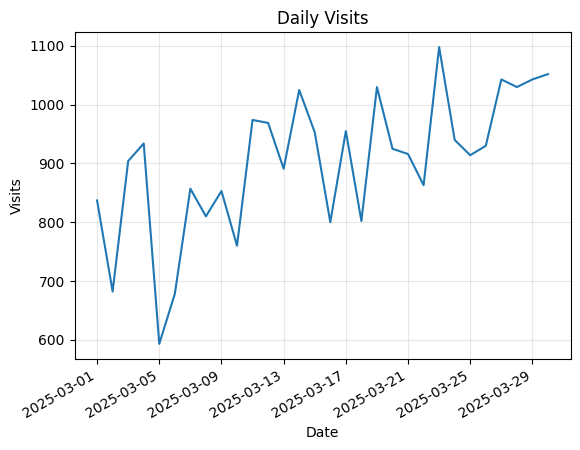

In [4]:
plt.plot(daily['date'], daily['visits'])
plt.title('Daily Visits')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.grid(True, alpha=.3)
plt.gcf().autofmt_xdate()
plt.show()

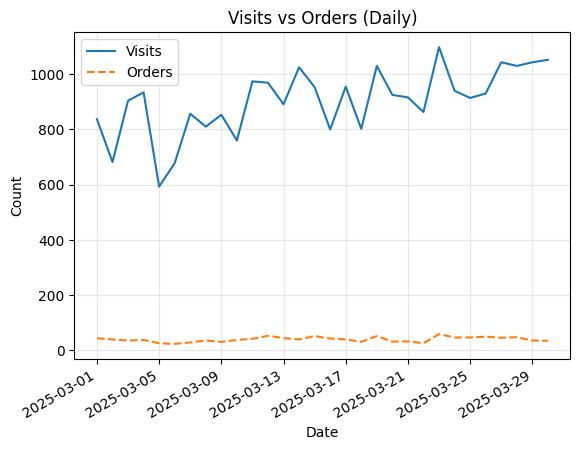

In [5]:
plt.plot(daily['date'], daily['visits'], label='Visits')
plt.plot(daily['date'], daily['orders'], linestyle='--', marker='', label='Orders')
plt.title('Visits vs Orders (Daily)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

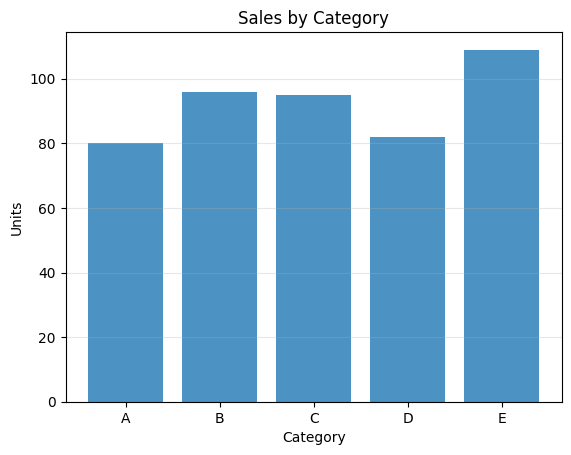

In [6]:
idx = np.arange(len(categories))
plt.bar(idx, category_sales.values, alpha=0.8)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Units')
plt.xticks(idx, categories)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

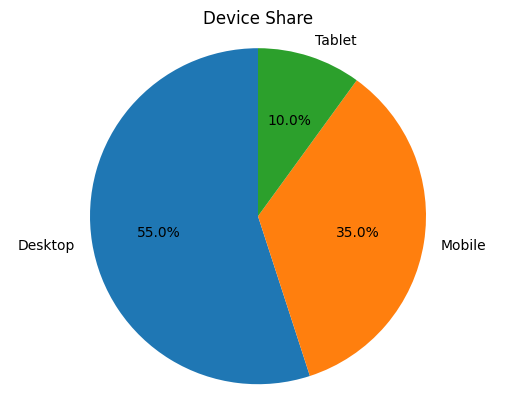

In [7]:
plt.title('Device Share')
plt.pie(device_share['share'].values, labels=device_share.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

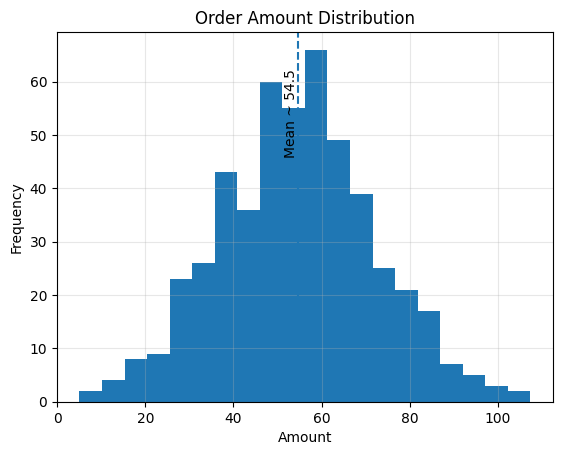

In [8]:
plt.hist(orders_df['amount'].values, bins=20)
mean_val = orders_df['amount'].mean()
plt.axvline(mean_val, linestyle='--')
plt.title('Order Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.text(mean_val, plt.ylim()[1]*0.9, f'Mean ~ {mean_val:.1f}', rotation=90, va='top', ha='right')
plt.show()